# Thesis data model comparison

### 1. Libraries and data cleaning

In [17]:
# paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools

# Las dos lineas siguientes son para el error: Script error for plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc, accuracy_score
import warnings

import mlflow
import mlflow.sklearn

%matplotlib inline

In [18]:
ruta = r'C:\Users\luism\OneDrive\m_Tesis\data_to.xlsx'
df = pd.read_excel(ruta)
df.head(5)

,FECHA DE INGRESO,FECHA DE BAJA,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia,Motivo de renuncia
0,2023-11-21 00:00:00,22/11/2023,baja,1.0,1979-08-26,Si,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,SECUNDARIA,FEMENINO,RENUNCIA VOLUNTARIA,SE LE COMPLICÓ EL HORARIO DEL TRANSPORTE PARA ...
1,2023-10-16 00:00:00,17/10/2023,baja,1.0,1993-09-02,NO,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,SECUNDARIA_TRUNCA,FEMENINO,SEPARACION VOLUNTARIA,PROBLEMA PERSONAL
2,2022-02-21 00:00:00,22/02/2022,baja,1.0,1993-10-17,NO,OP PRODUCCION,PRODUCCION,C,TALA,200.0,6000.0,SECUNDARIA,FEMENINO,ABANDONO,SOLO ACUDIÓ A INDUCCION
3,2022-02-21 00:00:00,22/02/2022,baja,1.0,1999-08-27,NO,OP PRODUCCION,PRODUCCION,C,TALA,200.0,6000.0,SECUNDARIA,FEMENINO,ABANDONO,SOLO ACUDIÓ A INDUCCION
4,2023-10-23 00:00:00,24/10/2023,baja,1.0,2002-06-16,NO,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,PREPARATORIA,FEMENINO,SEPARACION VOLUNTARIA,ENVIARON A TRABJAR FORANEO A SU ESPOSO Y EL CU...


In [19]:
missing_values_count = df.isnull().sum()
missing_values_count

FECHA DE INGRESO             0
FECHA DE BAJA               71
Estatus                      0
Días Laborados              71
FECHA DE NACIMIENTO        214
No de Crédito Infonavit      0
PUESTO                       0
AREA                         4
TURNO                        0
MUNICIPIO                    0
SALARIO DIARIO             214
SALARIO MENSUAL            214
ESCOLARIDAD                  0
GENERO                       0
Tipo de renuncia           104
Motivo de renuncia          56
dtype: int64

In [20]:
# Numerical variables
# schema
df.dtypes

FECHA DE INGRESO                   object
FECHA DE BAJA                      object
Estatus                            object
Días Laborados                    float64
FECHA DE NACIMIENTO        datetime64[ns]
No de Crédito Infonavit            object
PUESTO                             object
AREA                               object
TURNO                              object
MUNICIPIO                          object
SALARIO DIARIO                    float64
SALARIO MENSUAL                   float64
ESCOLARIDAD                        object
GENERO                             object
Tipo de renuncia                   object
Motivo de renuncia                 object
dtype: object

In [21]:
#Choose variables to work with: Estatus, PUESTO, AREA, TURNO, MUNICIPIO, GENERO, ESCOLARIDAD

df = pd.read_excel(ruta, usecols=['Estatus', 'PUESTO', 'AREA', 'TURNO', 'MUNICIPIO', 'GENERO', 'ESCOLARIDAD'])
df.head(5)

,Estatus,PUESTO,AREA,TURNO,MUNICIPIO,ESCOLARIDAD,GENERO
0,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA,FEMENINO
1,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA_TRUNCA,FEMENINO
2,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA,FEMENINO
3,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA,FEMENINO
4,baja,OP PRODUCCION,PRODUCCION,C,TALA,PREPARATORIA,FEMENINO


In [22]:
missing_values_count = df.isnull().sum()
missing_values_count

Estatus        0
PUESTO         0
AREA           4
TURNO          0
MUNICIPIO      0
ESCOLARIDAD    0
GENERO         0
dtype: int64

In [23]:
# Fill missing values with mode

for col in ['AREA']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

Estatus        0
PUESTO         0
AREA           0
TURNO          0
MUNICIPIO      0
ESCOLARIDAD    0
GENERO         0
dtype: int64

In [24]:
# proportion of 'baja'
df.groupby('Estatus').count()

,PUESTO,AREA,TURNO,MUNICIPIO,ESCOLARIDAD,GENERO
Estatus,,,,,,
activo,71,71,71,71,71,71
baja,431,431,431,431,431,431


### 2. Data analysis <br>

#### 2.1. Descriptive statistics

In [25]:
df.shape

(502, 7)

In [26]:
# Crosstab of percentage of active and non active against area
table = pd.crosstab(df.AREA, df.Estatus)
table
table.div(table.sum(axis=1).astype(float), axis=0)

Estatus,activo,baja
AREA,,
ALMACEN,0.204545,0.795455
CALIDAD,0.227273,0.772727
MANTENIMIENTO,0.100000,0.900000
PRENSA,0.038961,0.961039
PRODUCCION,0.183824,0.816176


In [27]:
df.describe()

,Estatus,PUESTO,AREA,TURNO,MUNICIPIO,ESCOLARIDAD,GENERO
count,502,502,502,502,502,502,502
unique,2,7,5,4,13,12,2
top,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA,FEMENINO
freq,431,268,272,200,465,210,266


#### 2.2. Frequency tables

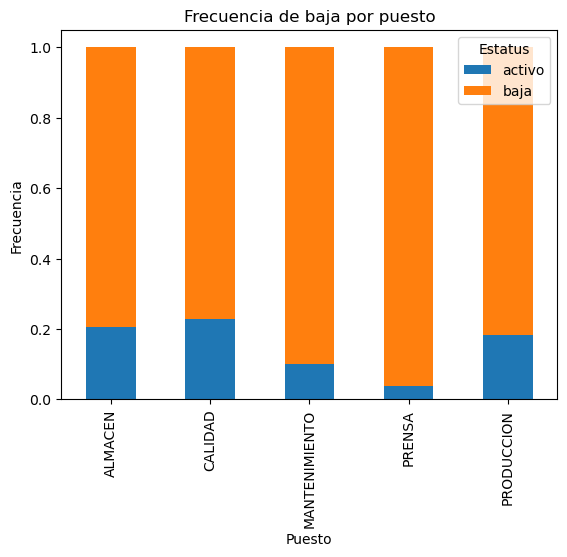

In [28]:
table = pd.crosstab(df.AREA, df.Estatus)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Frecuencia de baja por puesto')
plt.ylabel('Frecuencia')
plt.xlabel('Puesto')
plt.show()

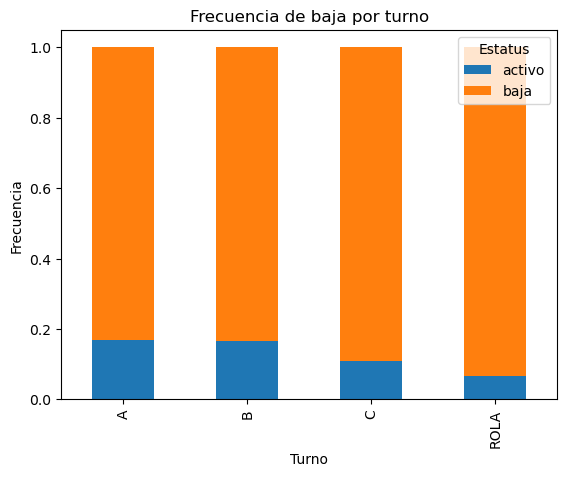

In [29]:
table = pd.crosstab(df.TURNO, df.Estatus)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Frecuencia de baja por turno')
plt.ylabel('Frecuencia')
plt.xlabel('Turno')
plt.show()

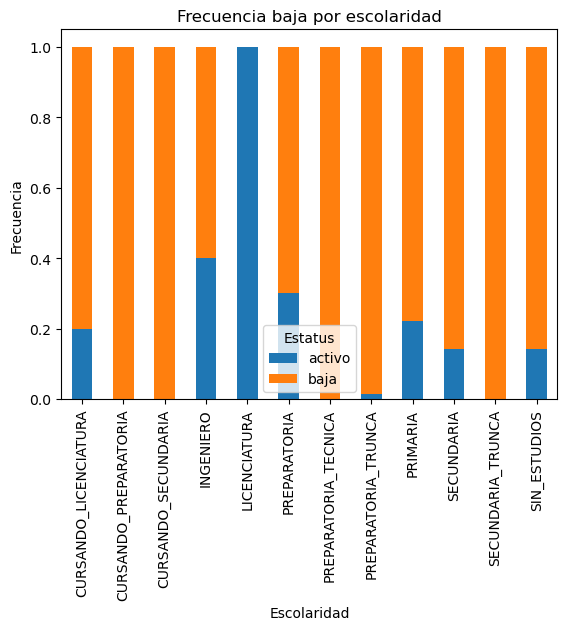

In [30]:
table = pd.crosstab(df.ESCOLARIDAD, df.Estatus)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Frecuencia baja por escolaridad')
plt.ylabel('Frecuencia')
plt.xlabel('Escolaridad')
plt.show()

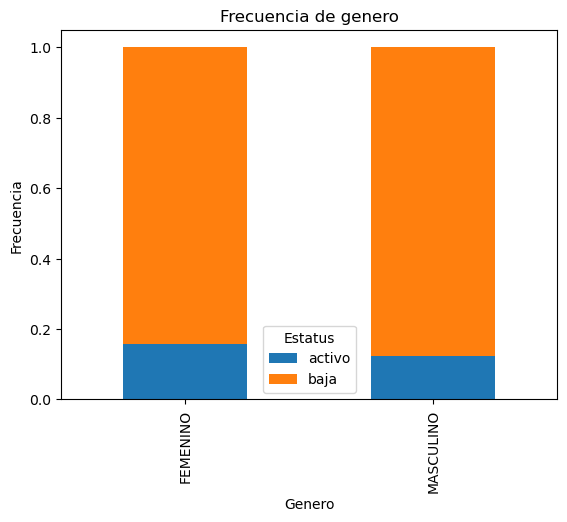

In [33]:
table = pd.crosstab(df.GENERO, df.Estatus)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Frecuencia de genero')
plt.ylabel('Frecuencia')
plt.xlabel('Genero')
plt.show()

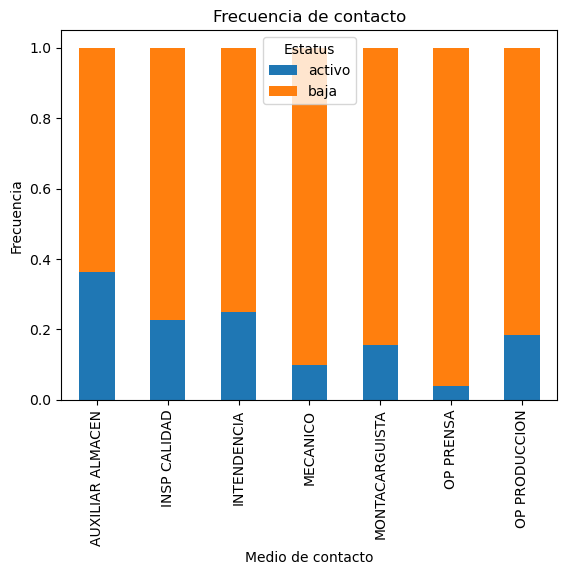

In [34]:
table = pd.crosstab(df.PUESTO, df.Estatus)
table.div(table.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Frecuencia de contacto')
plt.ylabel('Frecuencia')
plt.xlabel('Medio de contacto')
plt.show()

#### 2.3. Distribution of target variable

In [35]:
fig = go.Figure(data=[go.Pie(labels=['baja','activo'], values=df['Estatus'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2)))
fig.show()

### 3. Data preprocessing

#### 3.1. Label Encoding

In [36]:
df.dtypes

Estatus        object
PUESTO         object
AREA           object
TURNO          object
MUNICIPIO      object
ESCOLARIDAD    object
GENERO         object
dtype: object

In [37]:
# df['education'] = np.where(df['education'] == 'basic.4y', "Basic", df['education'])
# df['education'] = np.where(df['education'] == 'basic.6y', "Basic", df['education'])
# df['education'] = np.where(df['education'] == 'basic.9y', "Basic", df['education'])

categories = ['PUESTO', 'AREA', 'TURNO', 'MUNICIPIO', 'ESCOLARIDAD', 'GENERO']

for element in categories:
    tab_dummy = pd.get_dummies(df[element],prefix=element)
    data_new = df.join(tab_dummy)
    df = data_new

In [38]:
df.columns

Index(['Estatus', 'PUESTO', 'AREA', 'TURNO', 'MUNICIPIO', 'ESCOLARIDAD',
       'GENERO', 'PUESTO_AUXILIAR ALMACEN', 'PUESTO_INSP CALIDAD',
       'PUESTO_INTENDENCIA', 'PUESTO_MECANICO', 'PUESTO_MONTACARGUISTA',
       'PUESTO_OP PRENSA', 'PUESTO_OP PRODUCCION', 'AREA_ALMACEN',
       'AREA_CALIDAD', 'AREA_MANTENIMIENTO', 'AREA_PRENSA', 'AREA_PRODUCCION',
       'TURNO_A', 'TURNO_B', 'TURNO_C', 'TURNO_ROLA', 'MUNICIPIO_AHUISCULCO ',
       'MUNICIPIO_BUENA VISTA ', 'MUNICIPIO_CD GUZMAN', 'MUNICIPIO_EL ARENAL',
       'MUNICIPIO_HUAXTLA', 'MUNICIPIO_HUAXTLA ', 'MUNICIPIO_JALISCO',
       'MUNICIPIO_LA VENTA DEL ASTILLERO ', 'MUNICIPIO_SAN JUAN DE LOS ARCOS ',
       'MUNICIPIO_TALA', 'MUNICIPIO_TLAJOMULCO', 'MUNICIPIO_ZAMORA',
       'MUNICIPIO_ZAP', 'ESCOLARIDAD_CURSANDO_LICENCIATURA',
       'ESCOLARIDAD_CURSANDO_PREPARATORIA', 'ESCOLARIDAD_CURSANDO_SECUNDARIA',
       'ESCOLARIDAD_INGENIERO', 'ESCOLARIDAD_LICENCIATURA',
       'ESCOLARIDAD_PREPARATORIA', 'ESCOLARIDAD_PREPARATORIA_TE

In [39]:
# list of final variables
# comprehension list

to_keep = [element for element in df.columns if element not in categories]
to_keep

['Estatus',
 'PUESTO_AUXILIAR ALMACEN',
 'PUESTO_INSP CALIDAD',
 'PUESTO_INTENDENCIA',
 'PUESTO_MECANICO',
 'PUESTO_MONTACARGUISTA',
 'PUESTO_OP PRENSA',
 'PUESTO_OP PRODUCCION',
 'AREA_ALMACEN',
 'AREA_CALIDAD',
 'AREA_MANTENIMIENTO',
 'AREA_PRENSA',
 'AREA_PRODUCCION',
 'TURNO_A',
 'TURNO_B',
 'TURNO_C',
 'TURNO_ROLA',
 'MUNICIPIO_AHUISCULCO ',
 'MUNICIPIO_BUENA VISTA ',
 'MUNICIPIO_CD GUZMAN',
 'MUNICIPIO_EL ARENAL',
 'MUNICIPIO_HUAXTLA',
 'MUNICIPIO_HUAXTLA ',
 'MUNICIPIO_JALISCO',
 'MUNICIPIO_LA VENTA DEL ASTILLERO ',
 'MUNICIPIO_SAN JUAN DE LOS ARCOS ',
 'MUNICIPIO_TALA',
 'MUNICIPIO_TLAJOMULCO',
 'MUNICIPIO_ZAMORA',
 'MUNICIPIO_ZAP',
 'ESCOLARIDAD_CURSANDO_LICENCIATURA',
 'ESCOLARIDAD_CURSANDO_PREPARATORIA',
 'ESCOLARIDAD_CURSANDO_SECUNDARIA',
 'ESCOLARIDAD_INGENIERO',
 'ESCOLARIDAD_LICENCIATURA',
 'ESCOLARIDAD_PREPARATORIA',
 'ESCOLARIDAD_PREPARATORIA_TECNICA',
 'ESCOLARIDAD_PREPARATORIA_TRUNCA',
 'ESCOLARIDAD_PRIMARIA',
 'ESCOLARIDAD_SECUNDARIA',
 'ESCOLARIDAD_SECUNDARIA_TRUNC

In [40]:
df_final = df[to_keep]
df_final['Estatus'] = np.where(df_final['Estatus'] == 'activo',1,0)
df_final

C:\Users\luism\AppData\Local\Temp\ipykernel_26440\3103176711.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Estatus,PUESTO_AUXILIAR ALMACEN,PUESTO_INSP CALIDAD,PUESTO_INTENDENCIA,PUESTO_MECANICO,PUESTO_MONTACARGUISTA,PUESTO_OP PRENSA,PUESTO_OP PRODUCCION,AREA_ALMACEN,AREA_CALIDAD,...,ESCOLARIDAD_LICENCIATURA,ESCOLARIDAD_PREPARATORIA,ESCOLARIDAD_PREPARATORIA_TECNICA,ESCOLARIDAD_PREPARATORIA_TRUNCA,ESCOLARIDAD_PRIMARIA,ESCOLARIDAD_SECUNDARIA,ESCOLARIDAD_SECUNDARIA_TRUNCA,ESCOLARIDAD_SIN_ESTUDIOS,GENERO_FEMENINO,GENERO_MASCULINO
0,0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
2,0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,0,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,1,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
498,1,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
499,1,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
500,1,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False


In [41]:
#df_final.to_excel('df.xlsx')

In [42]:
X = to_keep.copy()
X.remove('Estatus')
Y=['Estatus']

We got numerical dummy variables.

### 4. Variables

#### 4.1 Independent variable selection

In [43]:
# creat a model of log regression
lr = LogisticRegression(max_iter=2000)

In [44]:
# recursive feature elimination
rfe = RFE(lr, step = 10)
rfe = rfe.fit(df_final[X], df_final[Y].values.ravel())

In [45]:
# RFE implementacion
rfe.support_

array([ True, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False])

In [46]:
rfe.ranking_

array([1, 4, 1, 4, 2, 1, 3, 3, 4, 4, 1, 3, 1, 3, 3, 1, 3, 3, 4, 1, 1, 1,
       3, 1, 1, 2, 3, 1, 1, 4, 4, 3, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4])

In [47]:
## feature list
# paste two lists -> list with tuples
support_list = list(zip(X,rfe.support_))
support_list

[('PUESTO_AUXILIAR ALMACEN', True),
 ('PUESTO_INSP CALIDAD', False),
 ('PUESTO_INTENDENCIA', True),
 ('PUESTO_MECANICO', False),
 ('PUESTO_MONTACARGUISTA', False),
 ('PUESTO_OP PRENSA', True),
 ('PUESTO_OP PRODUCCION', False),
 ('AREA_ALMACEN', False),
 ('AREA_CALIDAD', False),
 ('AREA_MANTENIMIENTO', False),
 ('AREA_PRENSA', True),
 ('AREA_PRODUCCION', False),
 ('TURNO_A', True),
 ('TURNO_B', False),
 ('TURNO_C', False),
 ('TURNO_ROLA', True),
 ('MUNICIPIO_AHUISCULCO ', False),
 ('MUNICIPIO_BUENA VISTA ', False),
 ('MUNICIPIO_CD GUZMAN', False),
 ('MUNICIPIO_EL ARENAL', True),
 ('MUNICIPIO_HUAXTLA', True),
 ('MUNICIPIO_HUAXTLA ', True),
 ('MUNICIPIO_JALISCO', False),
 ('MUNICIPIO_LA VENTA DEL ASTILLERO ', True),
 ('MUNICIPIO_SAN JUAN DE LOS ARCOS ', True),
 ('MUNICIPIO_TALA', False),
 ('MUNICIPIO_TLAJOMULCO', False),
 ('MUNICIPIO_ZAMORA', True),
 ('MUNICIPIO_ZAP', True),
 ('ESCOLARIDAD_CURSANDO_LICENCIATURA', False),
 ('ESCOLARIDAD_CURSANDO_PREPARATORIA', False),
 ('ESCOLARIDAD_CURSAN

In [48]:
X_final = [element[0] for element in support_list if element[1]]
X_final

['PUESTO_AUXILIAR ALMACEN',
 'PUESTO_INTENDENCIA',
 'PUESTO_OP PRENSA',
 'AREA_PRENSA',
 'TURNO_A',
 'TURNO_ROLA',
 'MUNICIPIO_EL ARENAL',
 'MUNICIPIO_HUAXTLA',
 'MUNICIPIO_HUAXTLA ',
 'MUNICIPIO_LA VENTA DEL ASTILLERO ',
 'MUNICIPIO_SAN JUAN DE LOS ARCOS ',
 'MUNICIPIO_ZAMORA',
 'MUNICIPIO_ZAP',
 'ESCOLARIDAD_INGENIERO',
 'ESCOLARIDAD_LICENCIATURA',
 'ESCOLARIDAD_PREPARATORIA',
 'ESCOLARIDAD_PREPARATORIA_TECNICA',
 'ESCOLARIDAD_PREPARATORIA_TRUNCA',
 'ESCOLARIDAD_PRIMARIA',
 'ESCOLARIDAD_SECUNDARIA_TRUNCA',
 'ESCOLARIDAD_SIN_ESTUDIOS']

#### 4.2. Feature selection

In [49]:
Y_rav = df[Y].values.ravel() # Reshape the target variable Y to a 1-dimensional array

estimator = LogisticRegression(random_state=15,
                               max_iter=5000)
rfecv = RFECV(estimator=estimator,
              cv=StratifiedKFold(10, random_state=17, shuffle=True),
              scoring="accuracy")
rfecv.fit(df[X], Y_rav)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=17, shuffle=True),
      estimator=LogisticRegression(max_iter=5000, random_state=15),
      scoring='accuracy')

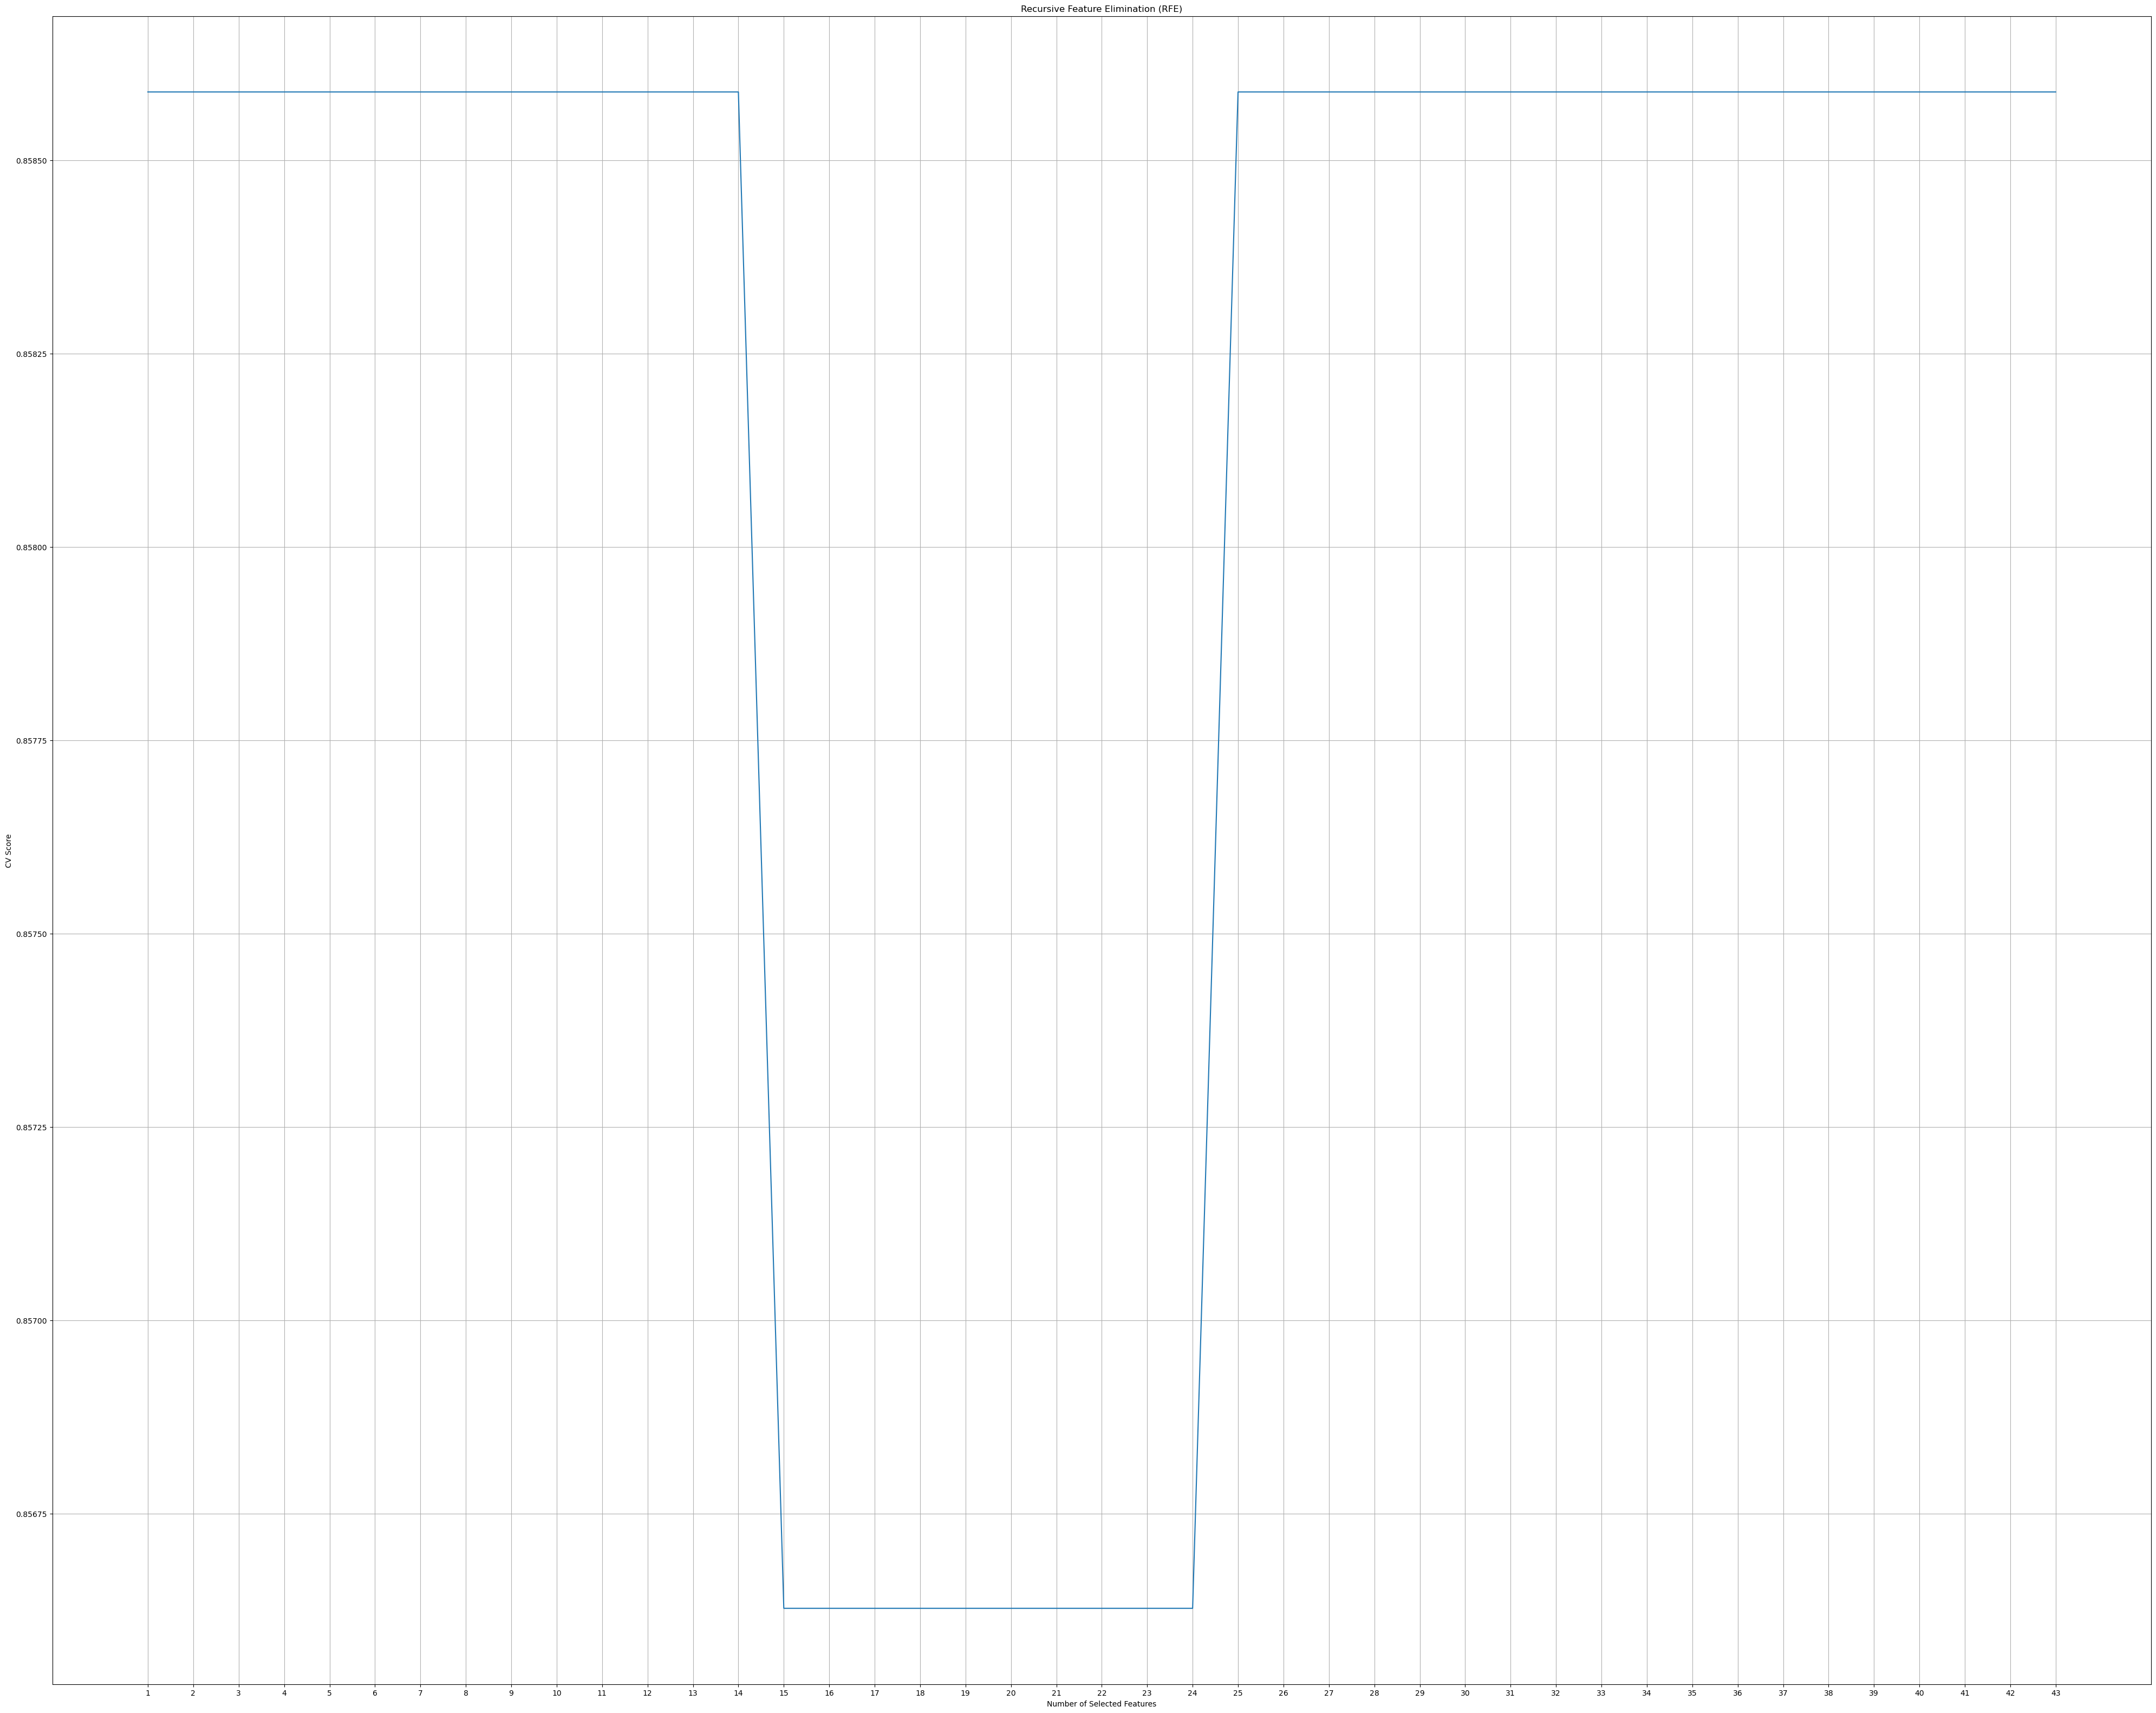

The optimal number of features: 1


In [50]:
plt.figure(figsize=(50, 40))  # Adjust the figure size according to your preference
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.grid()
plt.xticks(range(1, len(rfecv.support_) + 1))  # Use rfecv.support_ to get the number of features selected
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [51]:
#all selected features
X_rfe = df[X].iloc[:, rfecv.support_].columns.values.tolist()
#X_rfe

In [52]:
# Compare dimensions before and after RFE

print("\"X\" dimension: {}".format(df[X].shape))
#print("\"X\" column list:", df_tr_8[X].columns.tolist())
print("\"X_rfe\" dimension: {}".format(df[X_rfe].shape))
#print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (502, 43)
"X_rfe" dimension: (502, 1)


#### 4.3. Machine learning models

In [53]:
# Data splitting
# Datos de entrenamiento y datos de validación
X_train, X_test, X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(df[X],
                                                                             df[X_rfe],
                                                                             Y_rav, 
                                                                             train_size=0.8, 
                                                                             stratify=Y_rav,
                                                                             random_state=10)
print("Train size: {}".format(len(y_train)))
print("Test size: {}".format(len(y_test)))

Train size: 401
Test size: 101


In [54]:
random_state  = 13

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Decision Tree"]
clf_values = [LogisticRegression(random_state=random_state, max_iter=5000),
              SVC(kernel="linear", random_state=random_state),
              GaussianNB(),
              KNeighborsClassifier(),
              DecisionTreeClassifier(random_state=random_state, min_samples_split=50,min_samples_leaf=20)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Decision Tree"]
clf_rfe_values = [LogisticRegression(random_state=random_state, max_iter=5000),
                  SVC(kernel="linear", random_state=random_state),
                  GaussianNB(),
                  KNeighborsClassifier(),
                  DecisionTreeClassifier(random_state=random_state, min_samples_split=50,min_samples_leaf=20)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    clf.fit(X_train, y_train)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    clf_rfe.fit(X_rfe_train, y_train)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")



Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Decision Tree training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Decision Tree training: done!
Model training using feature-selected data: done!


In [55]:
# Check the accuracy between models after RFE

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_rfe_test)
    acc_rfe.append(accuracy_score(y_test, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},
                       index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.861386,0.861386
Support Vector Machine,0.861386,0.861386
Naive Bayes,0.287129,0.267327
k-Nearest Neighbors,0.841584,0.861386
Decision Tree,0.861386,0.861386


Accuracy
Original dataset            0.742574
Feature-selected dataset    0.742574


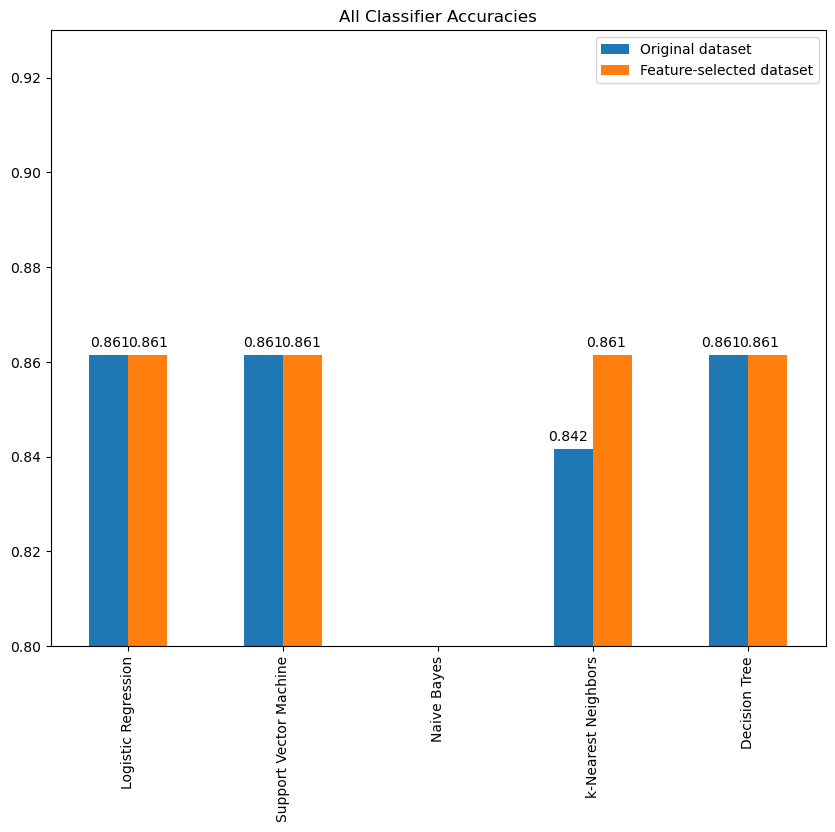

In [56]:
# Bar plot to observe

print("Accuracy\n" + acc_all.mean().to_string())

ax = acc_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.8, .93))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.show()

#### 4.4. Observations

We can observe that with RFE, the accuracy is very similar to that obtained using all the data, except for K-Nearest Neighbors, where original data has lower values. Naive Bayes has to be checked since it has results 0. However, this is enough to conclude that the use of the original dataset is equally valid as the one that underwent RFE.

### 5. Model evaulation

In [57]:
scoring = ["accuracy", "roc_auc"]
random_state=10

scores = []
# Original dataset
print("Cross-validation on original data: started!")
for clf_name, clf in clfs.items():
    score = pd.DataFrame(cross_validate(clf, df[X], Y_rav, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name, "cross-validation: done!")
cv_scores = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys)), clf_keys)))
print("Cross-validation on original data: done!\n")

scores = []
# Feature-selected dataset
print("Cross-validation on feature-selected data: started!")
for clf_name, clf in clfs_rfe.items():
    score = pd.DataFrame(cross_validate(clf, df[X_rfe], Y_rav, cv=StratifiedKFold(5, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name, "cross-validation: done!")
cv_scores_rfe = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys)), clf_keys)))
print("Cross-validation on feature-selected data: done!")

Cross-validation on original data: started!
Logistic Regression cross-validation: done!
Support Vector Machine cross-validation: done!
Naive Bayes cross-validation: done!
k-Nearest Neighbors cross-validation: done!
Decision Tree cross-validation: done!
Cross-validation on original data: done!

Cross-validation on feature-selected data: started!
Logistic Regression cross-validation: done!
Support Vector Machine cross-validation: done!
Naive Bayes cross-validation: done!
k-Nearest Neighbors cross-validation: done!
Decision Tree cross-validation: done!
Cross-validation on feature-selected data: done!


#### 5.1. Cross-validation accuracy

Cross-validation accuracy
Original data            0.740618
Feature-selected data    0.737057


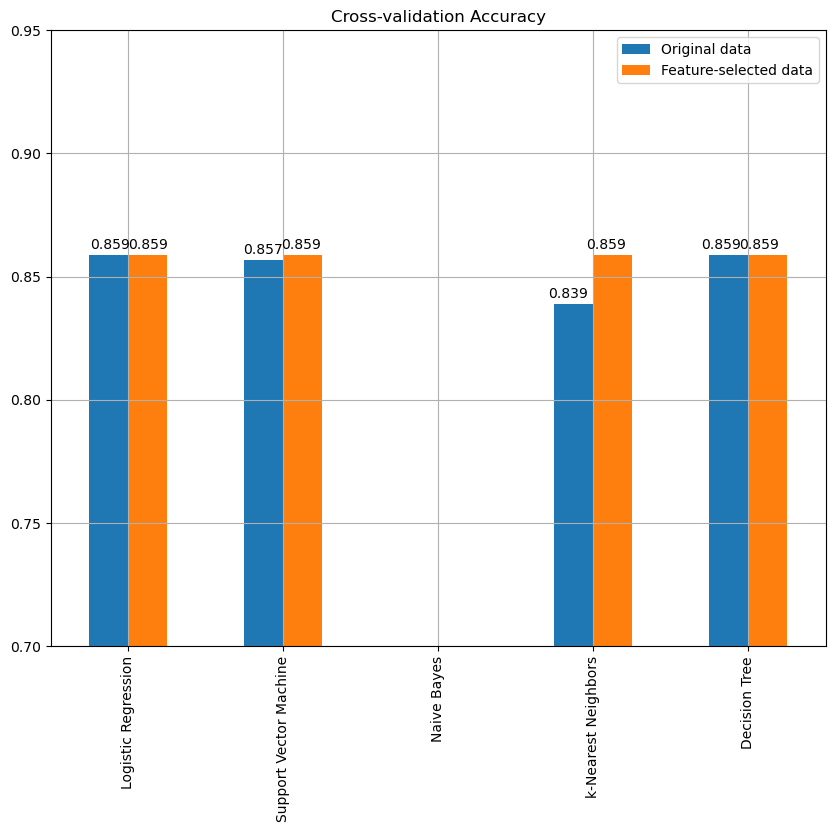

In [58]:
# Accuracy
cv_acc_all = pd.concat([cv_scores.loc["test_accuracy"].rename("Original data"), cv_scores_rfe.loc["test_accuracy"].rename("Feature-selected data")], 
                       axis=1)

print("Cross-validation accuracy\n" + cv_acc_all.mean().to_string())
ax = cv_acc_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.ylim((0.7, 0.95))
plt.title("Cross-validation Accuracy")
plt.grid()
plt.legend()
plt.show()


#### 5.2.1. Observations

In cross-validation accuracy, we found small differences for each of the models, although it is noteworthy that Naive Bayes doesn't perform at all. It is suggested to conduct a more in-depth review to determine the reason for this. In this metric, logistic regression and Support Vector Machine obtained the best results.

#### 5.3. Roc AUC

Cross-validation ROC AUC score
Original data            0.625428
Feature-selected data    0.538284


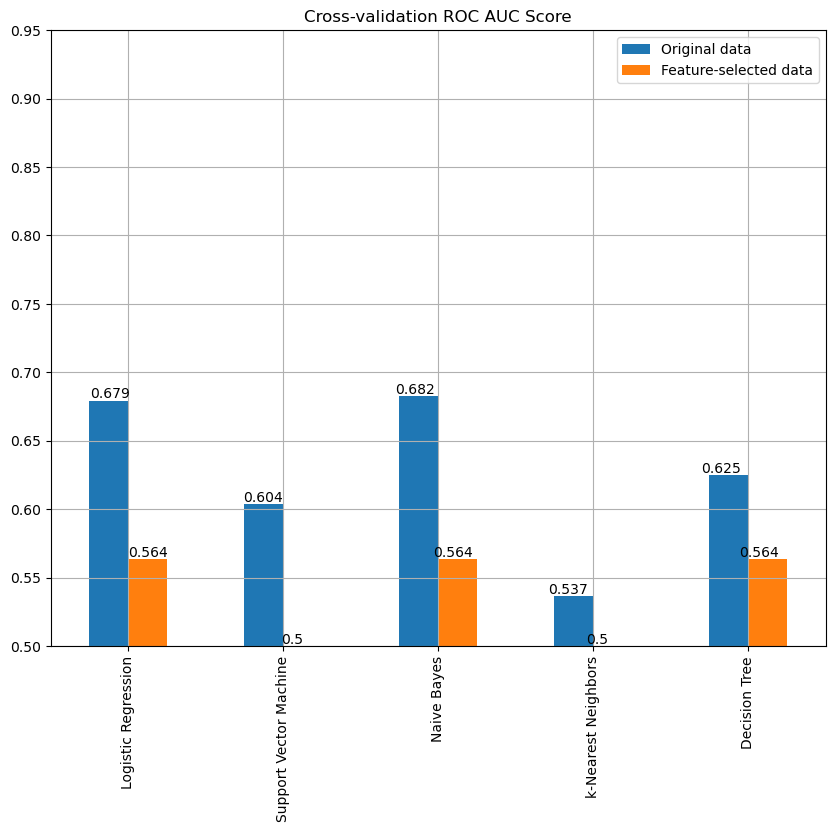

In [59]:
# ROC AUC
cv_roc_auc_all = pd.concat([cv_scores.loc["test_roc_auc"].rename("Original data"), cv_scores_rfe.loc["test_roc_auc"].rename("Feature-selected data")], 
                           axis=1)

print("Cross-validation ROC AUC score\n" + cv_roc_auc_all.mean().to_string())
ax = cv_roc_auc_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.ylim((0.5, 0.95))
plt.title("Cross-validation ROC AUC Score")
plt.grid()
plt.legend()
plt.show()

#### 5.3.1. Observations

In ROC AUC cross-validation, the models behave very similarly when working with RFE. Once again, the best results were obtained by logistic regression and Support Vector Machine, in that order.

#### 5.4. Cross-validation training time

Cross-validation fit time
Original data            0.011983
Feature-selected data    0.006637


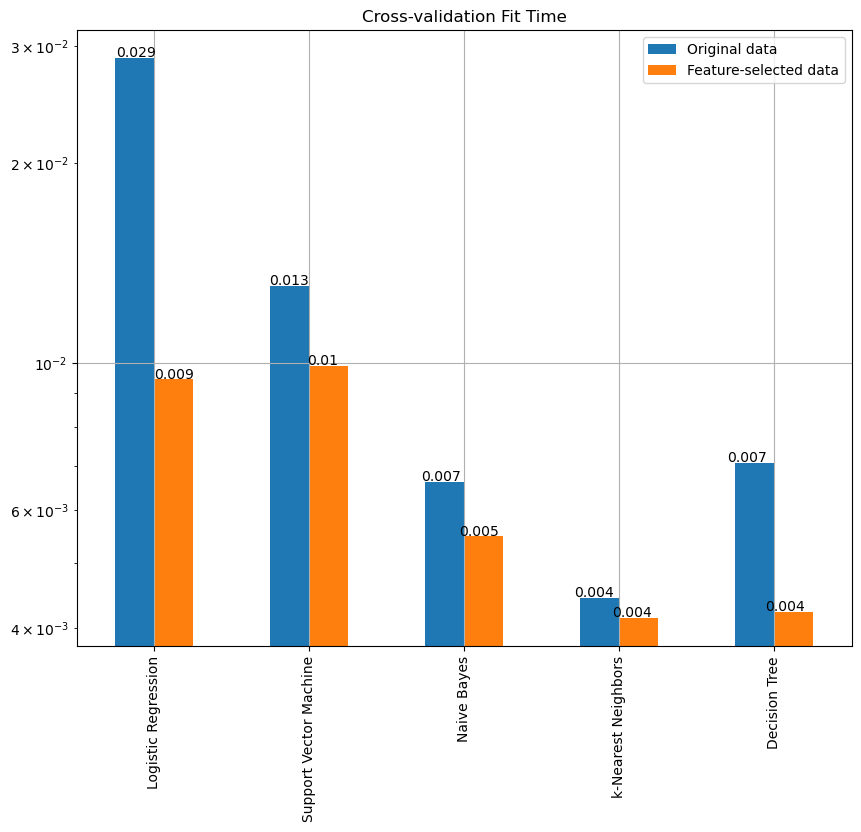

In [60]:
# Fit time
cv_fit_time_all = pd.concat([cv_scores.loc["fit_time"].rename("Original data"), cv_scores_rfe.loc["fit_time"].rename("Feature-selected data")], 
                           axis=1)

print("Cross-validation fit time\n" + cv_fit_time_all.mean().to_string())
ax = cv_fit_time_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.yscale("log")
plt.title("Cross-validation Fit Time")
plt.grid()
plt.legend()
plt.show()


#### 5.4.1. Observations

In cross-validation of fitting time, we observe the most noticeable differences, with Naive Bayes, K Nearest Neighbors, and Decision Tree models providing the best times, in that order. Regarding RFE, we did not notice a significant decrease in fitting time except for K-Nearest Neighbors, where the time is reduced by almost half.

#### 5.5. Importancia de características

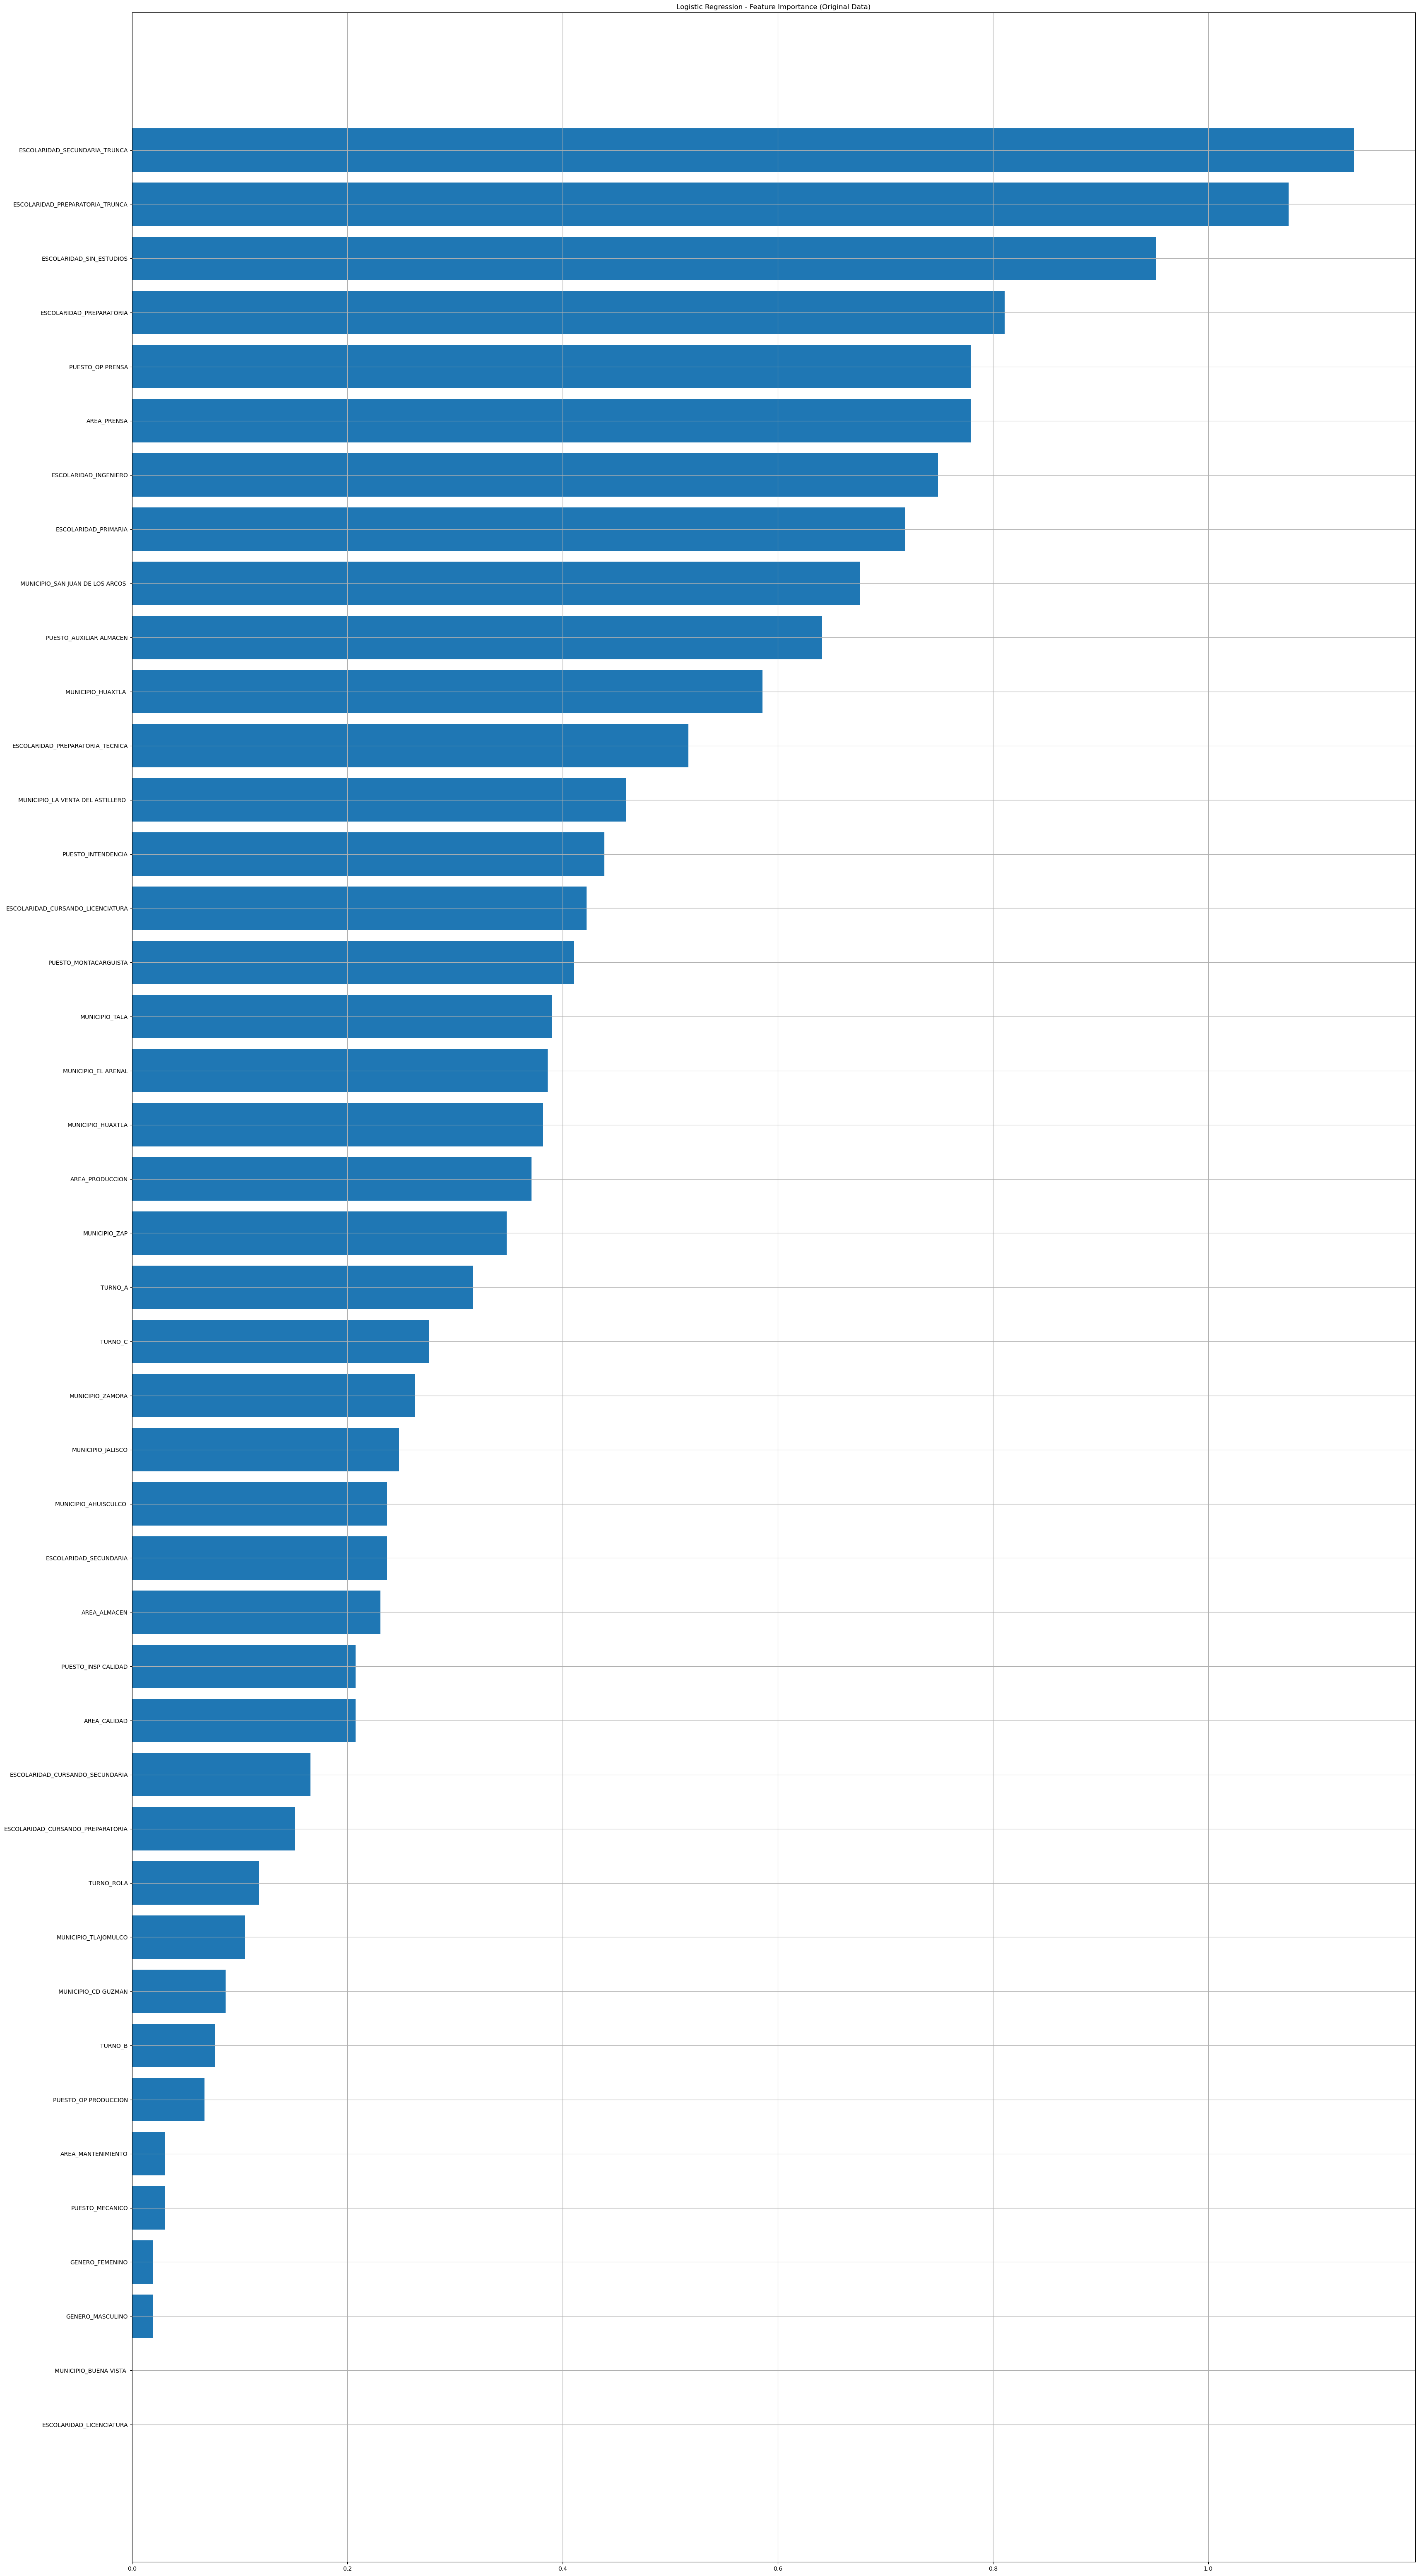

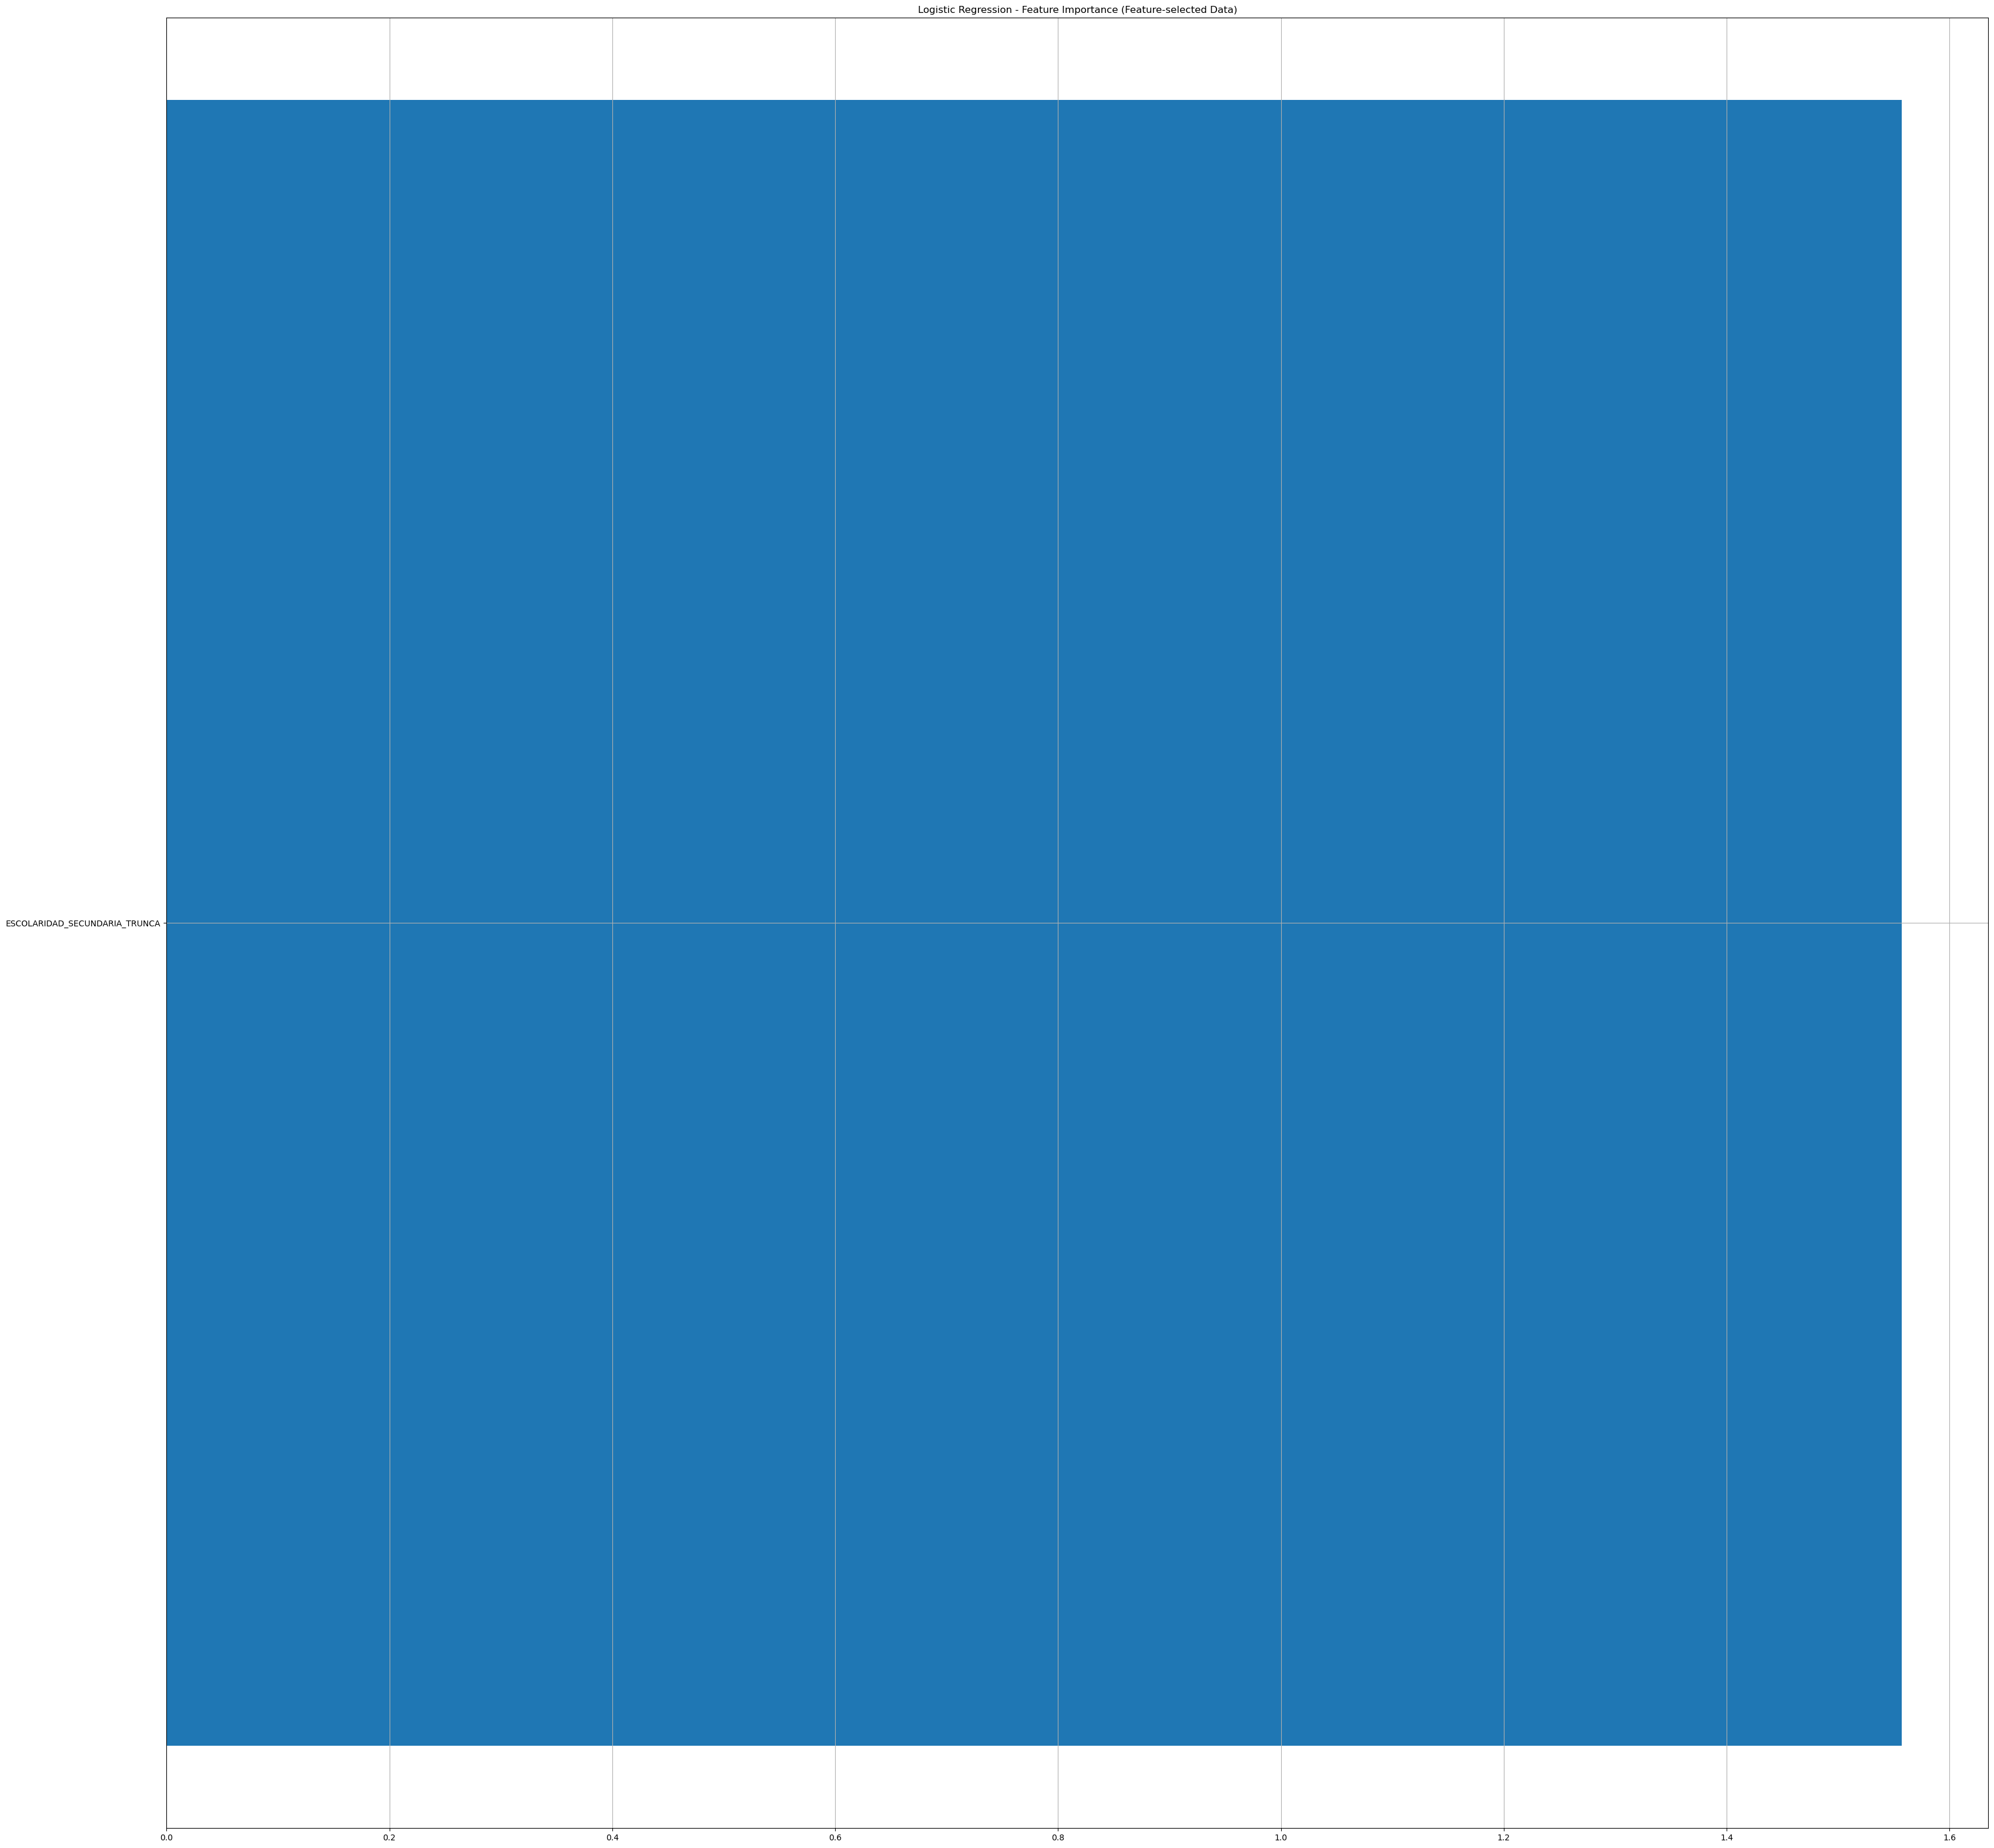

In [63]:
## Feature importance


importance = abs(clfs["Logistic Regression"].coef_[0])
plt.figure(figsize=(40,80))
plt.barh(df[X].columns.values[importance.argsort()], importance[importance.argsort()])
plt.title("Logistic Regression - Feature Importance (Original Data)")
plt.grid()
plt.show()

importance_rfe = abs(clfs_rfe["Logistic Regression"].coef_[0])
plt.figure(figsize=(40,40))
plt.barh(df[X_rfe].columns.values[importance_rfe.argsort()], importance_rfe[importance_rfe.argsort()])
plt.title("Logistic Regression - Feature Importance (Feature-selected Data)")
plt.grid()
plt.show()


 ### 6. MLFLow

In [ ]:
def metrics(X_test, clf, y_test):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    Accuracy = (tp + tn) / (tp + tn + fp + fn)
    Sensitivity = tp / (tp + fn)
    Specificity = tn / (tn + fp)
    Precision = tp / (tp + fp)
    F_measure = 2 * tp / (2 * tp + fp + fn)
    return Accuracy, Sensitivity, Specificity, Precision, F_measure

# Assuming you have 'X_test' and 'y_test' for both datasets, and 'clfs' and 'clfs_rfe' are dictionaries of classifiers

# Calculate metrics for the original dataset
metrics_original = {}
for clf_name, clf in clfs.items():
    metrics_original[clf_name] = metrics(X_test, clf, y_test)

# Calculate metrics for the feature-selected dataset
metrics_feature_selected = {}
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    metrics_feature_selected[clf_rfe_name] = metrics(X_rfe_test, clf_rfe, y_test)

# Create DataFrames from the metrics dictionaries
df_original = pd.DataFrame(metrics_original).T
df_original.columns = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F_measure']

df_feature_selected = pd.DataFrame(metrics_feature_selected).T
df_feature_selected.columns = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F_measure']

# Print or use the DataFrames as needed
print("Metrics for the Original Dataset:")
print(df_original)

print("\nMetrics for the Feature-Selected Dataset:")
print(df_feature_selected)

Metrics for the Original Dataset:
                        Accuracy  Sensitivity  Specificity  Precision  \
Logistic Regression     0.861386     1.000000     0.000000   0.861386   
Support Vector Machine  0.861386     1.000000     0.000000   0.861386   
Naive Bayes             0.287129     0.183908     0.928571   0.941176   
k-Nearest Neighbors     0.841584     0.965517     0.071429   0.865979   
Decision Tree           0.861386     1.000000     0.000000   0.861386   

                        F_measure  
Logistic Regression      0.925532  
Support Vector Machine   0.925532  
Naive Bayes              0.307692  
k-Nearest Neighbors      0.913043  
Decision Tree            0.925532  

Metrics for the Feature-Selected Dataset:
                        Accuracy  Sensitivity  Specificity  Precision  \
Logistic Regression     0.861386     1.000000          0.0   0.861386   
Support Vector Machine  0.861386     1.000000          0.0   0.861386   
Naive Bayes             0.267327     0.149425    

In [77]:
# Set up MLflow tracking
mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment('Thesis')

# Start MLflow run
with mlflow.start_run():
    
    # Log parameters
    # mlflow.log_param('Logistic_regression', 1)

    # Log metrics for the original dataset
    for idx, clf_name in enumerate(df_original.index):
        metrics_row = df_original.loc[clf_name]
        mlflow.log_metric('Accuracy', metrics_row['Accuracy'], step=idx)
        mlflow.log_metric('Sensitivity', metrics_row['Sensitivity'], step=idx)
        mlflow.log_metric('Specificity', metrics_row['Specificity'], step=idx)
        mlflow.log_metric('Precision', metrics_row['Precision'], step=idx)
        mlflow.log_metric('F-measure', metrics_row['F_measure'], step=idx)

    # Log metrics for the feature-selected dataset
    for idx, clf_rfe_name in enumerate(df_feature_selected.index):
        metrics_row_rfe = df_feature_selected.loc[clf_rfe_name]
        mlflow.log_metric('Accuracy_RFE', metrics_row_rfe['Accuracy'], step=idx)
        mlflow.log_metric('Sensitivity_RFE', metrics_row_rfe['Sensitivity'], step=idx)
        mlflow.log_metric('Specificity_RFE', metrics_row_rfe['Specificity'], step=idx)
        mlflow.log_metric('Precision_RFE', metrics_row_rfe['Precision'], step=idx)
        mlflow.log_metric('F-measure_RFE', metrics_row_rfe['F_measure'], step=idx)

print('MLflow run completed.')

# Detener el flujo de MLflow
mlflow.end_run()

MLflow run completed.


### 7. Conclusions
 

In general terms of this exercise, we can note that although RFE may not seem to make a significant difference in terms of accuracy and computation times, for larger datasets, it can be a great tool or for real-time data processing. Following that train of thought, and after observing the results, it would be proposed to use K Nearest Neighbors for large databases or real-time processing, and for smaller sets, logistic regression.